#### Prepare a classification model using Naive Bayes for salary data

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
test_data= pd.read_csv('SalaryData_Test.csv')
train_data= pd.read_csv('SalaryData_Train.csv')

## 3. Data Preparation

In [3]:
salary_data = test_data.append(train_data)

In [4]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Converting the categorical values to numeric values

In [6]:
le_column = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

##### *Label Encoder*

In [7]:
le = LabelEncoder()

In [8]:
for i in le_column:
    train_data[i]= le.fit_transform(train_data[i])
    test_data[i]=le.fit_transform(test_data[i])

*Mapping*

In [9]:
mapping = {' >50K': 1, ' <=50K': 2}

In [10]:
train_data = train_data.replace({'Salary': mapping})
test_data = test_data.replace({'Salary': mapping})

In [11]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [12]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,2
1,38,2,11,9,2,4,0,4,1,0,0,50,37,2
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,2


In [13]:
salary_data_new = test_data.append(train_data)
salary_data_new.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,2
1,38,2,11,9,2,4,0,4,1,0,0,50,37,2
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,2


### 4. Data Analysis

In [14]:
salary_data_new.shape

(45221, 14)

In [15]:
salary_data_new.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int64
dtype: object

In [16]:
salary_data_new.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
salary_data_new.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,2.204507,10.313217,10.118463,2.585148,5.969572,1.412684,3.680281,0.675062,1101.454700,88.548617,40.938038,35.431503,1.752151
std,13.217981,0.958132,3.816992,2.552909,1.500460,4.026444,1.597242,0.832361,0.468357,7506.511295,404.838249,12.007640,5.931380,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,2.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,2.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,2.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,2.000000


##### **Correlation Analysis**

In [18]:
corr = salary_data_new.corr()

**Heatmap for Correlation Analysis**

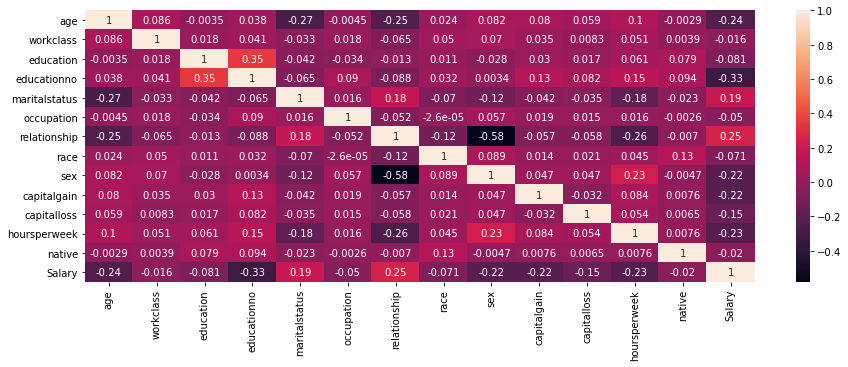

In [19]:
plt.figure(figsize=[15,5])
sns.heatmap(data = corr , annot =True)
plt.show()

## 5. Model Building

In [20]:
X_train = train_data.iloc[:,0:13]  
y_train = train_data.iloc[:,13]
X_test = test_data.iloc[:,0:13]
y_test = test_data.iloc[:,13]

#### ***Using Gaussian Naive Bayes***

##### Step 1:- ***Initialization of the model & Fitting the variables***

In [21]:
nb_gauss_classifier = GaussianNB()
nb_gauss_classifier.fit(X_train,y_train)

GaussianNB()

##### Step 2:- ***Model Testing***

In [22]:
y_pred_nbg = nb_gauss_classifier.predict(X_test)

##### Step 3:- ***Model Evaluation***

In [23]:
confusion_matrix(y_test, y_pred_nbg)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [24]:
accuracy_score(y_test,y_pred_nbg)

0.7946879150066402

In [25]:
recall_score(y_test,y_pred_nbg)

0.32675675675675675

#### ***Using Multinomial Naive Baiyes***

##### Step 1:- ***Initialization of the model & Fitting the variables***

In [26]:
nb_multi_classifier = MultinomialNB()
nb_multi_classifier.fit(X_train,y_train)

MultinomialNB()

##### Step 2:- ***Model Testing***

In [27]:
y_pred_nbm = nb_multi_classifier.predict(X_test)

##### Step 3:- ***Model Evaluation***

In [28]:
confusion_matrix(y_test,y_pred_nbm)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred_nbm)

0.7749667994687915

***Conclusion:-***
- *Gaussian Naive Bayes model has a better accuracy.*

## 6. Model Selection

In [30]:
from sklearn import model_selection

In [31]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [32]:
results = []
names = []
scoring = 'accuracy'

In [33]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	model_accuracy = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(model_accuracy)

LR: 0.801731 (0.006843)
KNN: 0.833759 (0.005387)
CART: 0.807301 (0.004779)
NB: 0.795498 (0.006570)


**Conclusion:-** 
- *KNN is having the best accuracy among other models.*

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**